In [1]:
import glob

In [7]:
from keras.models import Sequential, load_model

In [8]:
import numpy as np

In [9]:
import pandas as pd

In [10]:
from keras.layers import Dense

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [13]:
import matplotlib.pyplot as plt

In [14]:
import keras as k

In [16]:
df = pd.read_csv('kidney_disease.csv')

In [20]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
df.shape

(400, 26)

In [24]:
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

In [25]:
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

In [26]:
df = df.dropna(axis=0)

In [27]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform( df[column] )

<ipython-input-27-b8c4ad2b00e4>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [29]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [30]:
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [33]:
X

,sg,al,sc,hemo,pcv,htn
0,1.020,1.0,1.2,15.4,28,1
1,1.020,4.0,0.8,11.3,22,0
2,1.010,2.0,1.8,9.6,15,0
3,1.005,4.0,3.8,11.2,16,1
4,1.010,2.0,1.4,11.6,19,0
...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,31,0
396,1.025,0.0,1.2,16.5,38,0
397,1.020,0.0,0.6,15.8,33,0
398,1.025,0.0,1.0,14.2,35,0


In [35]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_name = X.columns
X[column_name] = x_scaler.transform(X)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [40]:
model = Sequential()
model.add( Dense(256, input_dim= len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation='relu') )
model.add( Dense(1, activation='hard_sigmoid') )


In [41]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, Y_train, epochs = 2000, batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7088 - accuracy: 0.2227
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.2882
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4934
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.7380
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6800 - accuracy: 0.9214
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.9170
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.8996
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.8952
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.8908
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.8865
Epoch 11/2000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9127
Epoch 84/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9127
Epoch 85/2000
1/1 [==============================] - 0s 996us/step - loss: 0.1917 - accuracy: 0.9127
Epoch 86/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9127
Epoch 87/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9127
Epoch 88/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9127
Epoch 89/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9170
Epoch 90/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9170
Epoch 91/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9301
Epoch 92/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.9301
Epoch 93/2000
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9738
Epoch 166/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0851 - accuracy: 0.9738
Epoch 167/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9738
Epoch 168/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9738
Epoch 169/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9738
Epoch 170/2000
1/1 [==============================] - 0s 996us/step - loss: 0.0829 - accuracy: 0.9738
Epoch 171/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9738
Epoch 172/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9738
Epoch 173/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9738
Epoch 174/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9738
Epoch 175/2

1/1 [==============================] - 0s 997us/step - loss: 0.0556 - accuracy: 0.9782
Epoch 247/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9782
Epoch 248/2000
1/1 [==============================] - 0s 939us/step - loss: 0.0551 - accuracy: 0.9782
Epoch 249/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9782
Epoch 250/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9782
Epoch 251/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9782
Epoch 252/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9782
Epoch 253/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9782
Epoch 254/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9782
Epoch 255/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9782
Epoch 256/2

1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9782
Epoch 328/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9782
Epoch 329/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9825
Epoch 330/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9825
Epoch 331/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9825
Epoch 332/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9825
Epoch 333/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9825
Epoch 334/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9825
Epoch 335/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9825
Epoch 336/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9825
Epoch 337/2000


1/1 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9825
Epoch 409/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9825
Epoch 410/2000
1/1 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9825
Epoch 411/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0325 - accuracy: 0.9825
Epoch 412/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9825
Epoch 413/2000
1/1 [==============================] - 0s 975us/step - loss: 0.0324 - accuracy: 0.9825
Epoch 414/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9825
Epoch 415/2000
1/1 [==============================] - 0s 995us/step - loss: 0.0322 - accuracy: 0.9825
Epoch 416/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9825
Epoch 417/2000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9869
Epoch 490/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9869
Epoch 491/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9869
Epoch 492/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9869
Epoch 493/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9869
Epoch 494/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9869
Epoch 495/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9869
Epoch 496/2000
1/1 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9869
Epoch 497/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9869
Epoch 498/2000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9869
Epoch 571/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9869
Epoch 572/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9869
Epoch 573/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0243 - accuracy: 0.9869
Epoch 574/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9869
Epoch 575/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9869
Epoch 576/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9869
Epoch 577/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9869
Epoch 578/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9869
Epoch 579/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9869
Epoch 580/2000


Epoch 652/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 653/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 654/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 655/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 656/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 657/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0219 - accuracy: 0.9869
Epoch 658/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 659/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 660/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 661/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.986

1/1 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 734/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 735/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 736/2000
1/1 [==============================] - 0s 996us/step - loss: 0.0203 - accuracy: 0.9869
Epoch 737/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 738/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 739/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 740/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 741/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 742/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 743/200

1/1 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 815/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 816/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 817/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 818/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 819/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 820/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 821/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 822/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 823/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9869
Epoch 824/2000


1/1 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 896/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 897/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 898/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 899/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 900/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 901/2000
1/1 [==============================] - 0s 999us/step - loss: 0.0175 - accuracy: 0.9913
Epoch 902/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 903/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 904/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9913
Epoch 905/200

1/1 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9913
Epoch 977/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9913
Epoch 978/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162 - accuracy: 0.9913
Epoch 979/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9913
Epoch 980/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9913
Epoch 981/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9913
Epoch 982/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0162 - accuracy: 0.9913
Epoch 983/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9913
Epoch 984/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9913
Epoch 985/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9913
Epoch 986/200

1/1 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 1058/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1059/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1060/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1061/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1062/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1063/2000
1/1 [==============================] - 0s 995us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1064/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1065/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 1066/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9956
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 1139/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 1140/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 1141/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 1142/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 1143/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 1144/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 1145/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 1146/2000
1/1 [==============================] - 0s 937us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 1147/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Ep

Epoch 1219/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1220/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1221/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1222/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1224/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1225/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1226/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 1227/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 1228/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0132 - accurac

1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1301/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1302/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1303/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1304/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1305/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1306/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1307/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1308/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1382/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1383/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1384/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1385/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1386/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1387/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1388/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1389/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch 1390/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9956
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1463/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1464/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 1465/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1466/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1467/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1468/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1469/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1470/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 1471/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1544/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1545/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1546/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1547/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1548/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1549/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1550/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1551/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1552/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9956
Epoc

1/1 [==============================] - 0s 997us/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1625/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1626/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1627/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1628/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1629/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1630/2000
1/1 [==============================] - 0s 999us/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1631/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1632/2000
1/1 [==============================] - 0s 993us/step - loss: 0.0090 - accuracy: 0.9956
Epoch 1633/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9956


1/1 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1706/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1707/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1708/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1710/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1711/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 1712/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9956
Epoch 1714/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0084 - accuracy: 0.9956
Ep

1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1786/2000
1/1 [==============================] - 0s 963us/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1787/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1788/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1789/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1790/2000
1/1 [==============================] - 0s 947us/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1791/2000
1/1 [==============================] - 0s 952us/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1792/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1793/2000
1/1 [==============================] - 0s 995us/step - loss: 0.0080 - accuracy: 0.9956
Epoch 1794/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.995

1/1 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1867/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1868/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1869/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1870/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1871/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1872/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1873/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 1874/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1875/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.9956
Epoc

1/1 [==============================] - 0s 997us/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1948/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1949/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1950/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1951/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1952/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1953/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9956
Epoch 1954/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1955/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1956/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9956
Epoc

In [43]:
model.save('ckd.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ckd.model\assets


Text(0.5, 0, 'epoch')

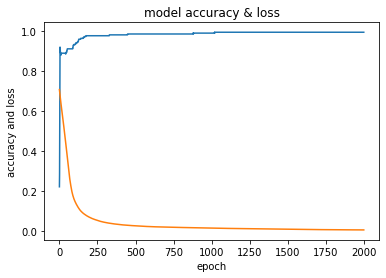

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [47]:
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (229, 6)
shape of test data: (58, 6)


In [48]:
pred = model.predict(X_test)
pred

array([[0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.9899174],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.8733265],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.5625331],
       [0.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],


In [49]:
pred = [1 if y>=0.5 else 0 for y in pred]
pred

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]

In [51]:
Y_test

101    0
32     0
90     0
184    0
278    1
361    1
93     0
372    1
377    1
179    0
9      0
48     0
341    1
210    0
290    1
169    0
317    1
258    1
102    0
332    1
43     0
213    0
189    0
62     0
354    1
20     0
33     0
364    1
135    0
335    1
386    1
212    0
302    1
152    0
277    1
180    0
26     0
360    1
306    1
266    1
24     0
79     0
53     0
296    1
389    1
47     0
352    1
355    1
107    0
251    1
260    1
250    1
370    1
383    1
157    0
243    0
321    1
111    0
Name: classification, dtype: int32

In [52]:
print('Original : {0}'.format(",".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(",".join(str(x) for x in pred)))

Original : 0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0
Predicted : 0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0
